## Tutorial 3: The concave log-likelihood function of the linear-additive RUM-MNL model

The log-likelihood function is a mathematical function that represents the log of the probability of observing the given data under a specific statistical model, as a function of the model parameters. It is used to estimate the parameters of the choice model that are most likely to have produced the observed data.<br><br>
For the linear-additive RUM-MNL model, the log-likelihood function is globally concave. This means that:
1. The function has a single maximum, so the function is “bending downwards”.
1. The first derivative (in all directions) is zero only at the **global** maximum.
1. The second derivative is negative. 
 
 Estimation of the parameters of choice models is usually done using Maximum Likelihood Estimation (MLE). MLE involves an iterative numerical process, typically using a Newton-Raphson, to recover the maximum likelihood estimates $\hat{\beta}$.  Because the log-likelihood function of the linear-additive RUM-MNL model is concave, the optimisation algorithm is 'garantueed' to converge to the global maximum. The only thing it has to do is to find the direction of the steepest ascent, and follow that direction until it reaches the maximum.<br><br>
<br>
**This tutorial will:**<br>
1. **Discuss the difference between concave versus non-concave log-likelihood functions.**<br><br>
2. **Show that the log-likelihood function of the linear-additive RUM-MNL model is globally concave.**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
from pathlib import Path
import plotly.graph_objects as go

#### 1. Concave versus non-concave (likelihood) functions

Let's first visualise the difference between concave and non-concave functions. We show a concave function and a non-concave function.<br>
For the purpose of illustration, we use a simple polynomial function to create the LL function (i.e. instead of a true log-likelihood functions computed from data, depending on a vector with betas). <br>
Specifically, we use the following functions:<br>
1. $LL(\beta) = -\beta^2 + 2\beta + 1$ (concave function)
1. $LL(\beta) = -0.4\beta^4 + 0.1\beta^3 + 3\beta^2 -1.2\beta - 12$ (non-concave function) <br>

Note that these LL functions are a function of a single parameter $\beta$ (as opposed to a vector of parameters $\beta$).

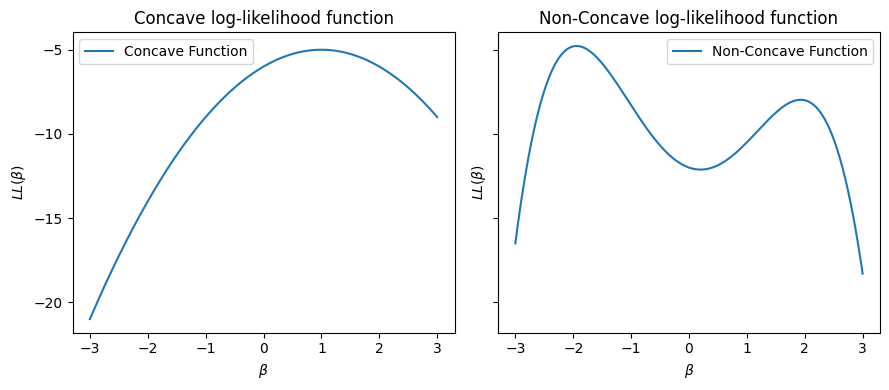

In [2]:
# Define the concave function
def concave_function(x):
    return -x**2 + 2*x + -6

# Define the non-concave function
def non_concave_function(x):
    return -0.4*x**4 + 0.1*x**3 + 3*x**2 - 1.2*x - 12

# Generate beta values
beta = np.linspace(-3, 3, 400)

# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey=True,sharex=True)

# Plot the concave function
ax[0].plot(beta, concave_function(beta), label='Concave Function')
ax[0].set_title('Concave log-likelihood function')
ax[0].set_xlabel('$\\beta$')
ax[0].set_ylabel('$LL(\\beta)$')
ax[0].legend()
ax[0].set_yticks(np.arange(-20, 5, 5))

# Plot the non-concave function
ax[1].plot(beta, non_concave_function(beta), label='Non-Concave Function')
ax[1].set_title('Non-Concave log-likelihood function')
ax[1].set_xlabel('$\\beta$')
ax[1].set_ylabel('$LL(\\beta)$')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

`Based on the plot, we can make a couple of observations:`<br><br>
`1. The concave function have one maximum, while the concave function has more than one`<br><br>
`2. For the concave function, β = 1 makes the data maximum likely; for the non-concave function β ≈ -2  makes the data maximum likely.`

##### Proof
Now let's mathematically proof that these log-likelihood functions are concave and non-concave, respectively. <br>
To do so, we must compute the second derivative of the log-likelihood functions, w.r.t. beta.<br><br>

##### First order derivate of the concave log-likelihood function:

\begin{align*}
\frac{\partial LL(\beta)}{\partial \beta} &= \frac{\partial}{\partial \beta} \left( -\beta^2 + 2\beta - 6 \right) \\
\frac{\partial LL(\beta)}{\partial \beta} &= -2\beta + 2
\end{align*}

##### First order derivate of the non-concave log-likelihood function:

\begin{align*}
\frac{\partial LL(\beta)}{\partial \beta} &= \frac{\partial}{\partial \beta} \left( -0.4x^4 + 0.1x^3 + 3x^2 - 1.2x - 12 \right) \\
\frac{\partial LL(\beta)}{\partial \beta} &= -1.6x^3 + 0.3x^2 + 6x - 1.2
\end{align*}



Equating the first order derivatives to zero and **solving**, provides the optimal betas for the concave and non-concave functions, respectively.:<br>
For the concave function:
\begin{align*}
-2\beta + 2 &= 0 \\
\beta &= 1
\end{align*}

For the non-concave function:
\begin{align*}
-1.6x^3 + 0.3x^2 + 6x - 1.2 &= 0 \\
\beta &\approx -1.942 \\
\beta &\approx 0.200 \\
\beta &\approx 1.930 \\
\end{align*}
Note that to solve the non-concave function, we can used a numerical solver, as the main point here is to show that the non-concave function has multiple solutions.


##### Second order derivate of the concave log-likelihood function:

\begin{align*}
\frac{\partial^2 LL(\beta)}{\partial \beta^2} &= \frac{\partial}{\partial \beta} \left( -2\beta + 2 \right) \\
\frac{\partial^2 LL(\beta)}{\partial \beta^2} &= -2
\end{align*}

##### Second order derivate of the non-concave log-likelihood function:

\begin{align*}
\frac{\partial^2 LL(\beta)}{\partial \beta^2} &= \frac{\partial}{\partial \beta} \left( -1.6\beta^3 + 0.3\beta^2 + 6\beta - 1.2 \right) \\
\frac{\partial^2 LL(\beta)}{\partial \beta^2} &= -4.8\beta^2 + 0.6\beta + 6
\end{align*}

`--> Observations:`<br>
`1. The second order derivative of the concave function is negative in the entire domain: it takes the value -2 everywhere. This is a necessary and sufficient condition for concativity.`<br><br>

`2. The second order derivative of the non-concave function is not negative in the entire domain, which is a necessary and sufficient condition for non-concavity.`

For completeness, we also plot the log-likelihood functions and their first and second order derivatives in the code below.

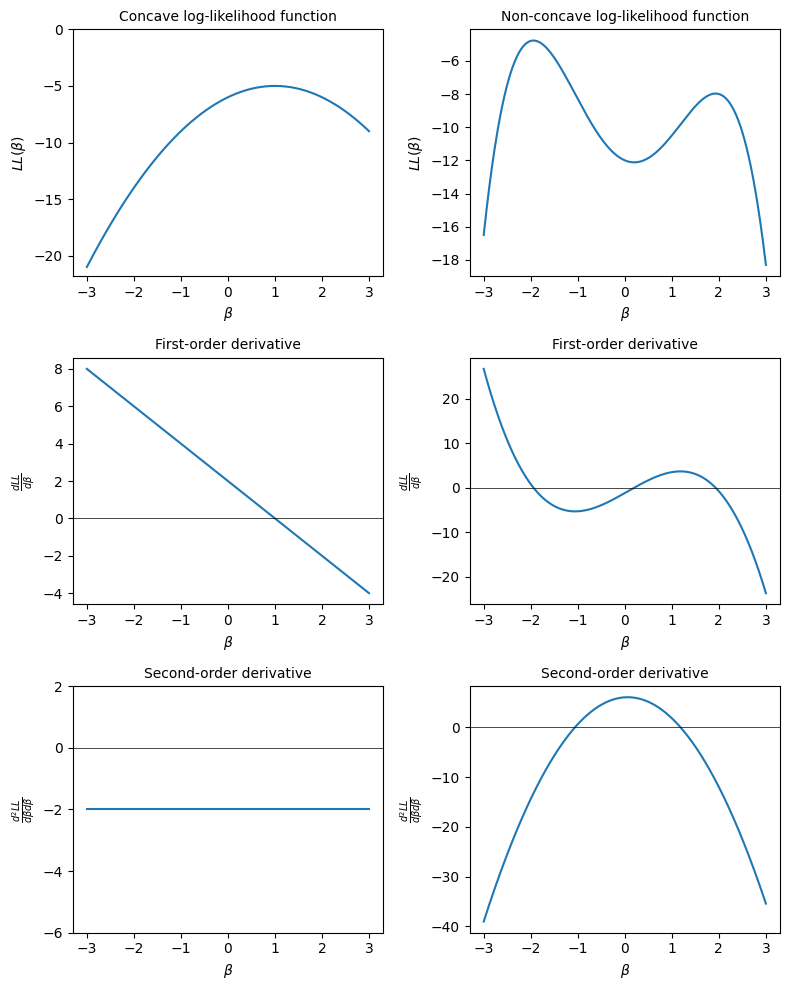

In [3]:
# Plot the second derivative of the concave function as a function of x
def frst_derivative_concave_function(x):
    return -2*x + 2

def frst_derivative_non_concave_function(x):
    return -1.6*x**3 + 0.3*x**2 + 6*x - 1.2

def scnd_derivative_concave_function(x):
    return -2 +0*x

def scnd_derivative_non_concave_function(x):
    return -4.8*x**2 + 0.6*x + 6

fig, ax = plt.subplots(3, 2, figsize=(8, 10))

# Plot the concave function
ax[0,0].plot(beta, concave_function(beta), label='Concave Function')
ax[0,0].set_title('Concave log-likelihood function', fontsize=10)
ax[0,0].set_xlabel('$\\beta$')
ax[0,0].set_ylabel('$LL(\\beta)$')
ax[0,0].set_yticks(np.arange(-20, 5, 5))

# Plot the non-concave function
ax[0,1].plot(beta, non_concave_function(beta), label='Non-concave Function')
ax[0,1].set_title('Non-concave log-likelihood function', fontsize=10)
ax[0,1].set_xlabel('$\\beta$')
ax[0,1].set_ylabel('$LL(\\beta)$')

# Plot the first derivative of the concave function
ax[1,0].plot(beta, frst_derivative_concave_function(beta), label='Concave Function')
ax[1,0].axhline(0, color='black', linewidth=0.5)
ax[1,0].set_title('First-order derivative', fontsize=10)
ax[1,0].set_xlabel('$\\beta$')
ax[1,0].set_ylabel('$\\frac{dLL}{d\\beta}$')

# Plot the first derivative of the non-concave function
ax[1,1].plot(beta, frst_derivative_non_concave_function(beta), label='Non-concave Function')
ax[1,1].axhline(0, color='black', linewidth=0.5)
ax[1,1].set_title('First-order derivative', fontsize=10)
ax[1,1].set_xlabel('$\\beta$')
ax[1,1].set_ylabel('$\\frac{dLL}{d\\beta}$')

# Plot the second derivative of the concave function
ax[2,0].plot(beta, scnd_derivative_concave_function(beta), label='Concave Function')
ax[2,0].axhline(0, color='black', linewidth=0.5)
ax[2,0].set_title('Second-order derivative', fontsize=10)
ax[2,0].set_xlabel('$\\beta$')
ax[2,0].set_ylabel('$\\frac{d^2LL}{d\\beta d\\beta}$')
ax[2,0].set_yticks(np.arange(-6, 4, 2))

# Plot the second derivative of the non-concave function
ax[2,1].plot(beta, scnd_derivative_non_concave_function(beta), label='Non-concave Function')
ax[2,1].axhline(0, color='black', linewidth=0.5)
ax[2,1].set_title('Second-order derivative', fontsize=10)
ax[2,1].set_xlabel('$\\beta$')
ax[2,1].set_ylabel('$\\frac{d^2LL}{d\\beta d\\beta}$')

# Show the plots
plt.tight_layout()
plt.show()

#### 2. Concavity of the log-likelihood function of the linear-additive RUM-MNL model

Now, let's proof that the log-likelihood function of the linear-additive RUM-MNL model is globally concave. <br>
Hence, we have to establish the LL function is concave. To do this, we must proof that the second order-derivatives of the log-likelihood function wrt $\beta$ is negative in the entire domain. <br>

The log-likelihood function of a choice model is given by: <br>
\begin{align*}
LL(\beta) &= \sum_{n} \sum_{i} y_{ni} \ln P_{ni}
\end{align*}

Where:
- $n$ is the observation
- $i$ is an alternative
- $y_{ni}$ is a binary variable indicating 1 for the chosen alternative, and 0 for the non-chosen alternatives
- $ P_{ni} $ is the probability of choosing alternative $i$ for observation $n$.


Assuming utility is linear-additive RUM, the log-likelihood function can be written as: <br>

\begin{align*}
LL(\beta) &= \sum_{n} \sum_{i} y_{ni} \ln \left( \frac{e^{\beta' x_{ni}}}{\sum_{j} e^{\beta' x_{nj}}} \right) \\
          &= \sum_{n} \sum_{i} y_{ni} (\beta' x_{ni}) - \sum_{n} \sum_{i} y_{ni} \ln \left( \sum_{j} e^{\beta' x_{nj}} \right)
\end{align*}

Where:
- $\beta$ is the vector of parameters to be estimated
- $j$ is an alternative
- $x_{nj}$ is the vector of attributes of alternative $j$ for observation $n$

The first order derivative of the log-likelihood function of the RUM-MNL model w.r.t. $\beta$ is given by (see chapter 3 of Train (2009) for more details): <br>
\begin{align*}
\frac{\partial LL(\beta)}{\partial \beta}= \sum_{n} \sum_{i} (y_{ni} - P_{ni}) x_{ni}
\end{align*}


The second order derivative of the log-likelihood function of the RUM-MNL model w.r.t. $\beta$ is given by: <br>
\begin{align*}
\frac{\partial^2 LL(\beta)}{\partial \beta \partial \beta} = -\sum_{n} \sum_{i} \sum_{j} P_{ni} \left( \delta_{ij} - P_{nj} \right) x_{ni} x_{nj}'
\end{align*}

Where:
- $ \delta_{ij} $ is the Kronecker delta, equal to 1 if $i = j$ and 0 otherwise.


`--> Even though the formula is relative simple and compact, it is hard to see that the second order derivative is negative in the entire domain.`

 Let's for our convenience simplify the math a bit by looking at the binary case, where we have just two alternatives. In this case, the second order derivative simplifies to: <br>

\begin{align*}
\frac{\partial^2 LL(\beta)}{\partial \beta \partial \beta} = - \sum_n P_{n1}(1 - P_{n1})(x_{n1} - x_{n2})(x_{n1} - x_{n2})'
\end{align*}

`--> Using this formula we can show that the second order derivatives are negative in the entire domain, considering that:`<br>
1. The term $P_{n1}(1 - P_{n1})$ is always positive, as it is the product of two probabilities.
1. The term $(x_{n1} - x_{n2})(x_{n1} - x_{n2})'$ is also always positive, as it is the outer product of a vector with itself (which always yields a positive semi-definite matrix). 
1. The negative sign in front of the sum ensures that the sum is negative.

`--> This proofs that the log-likelihood function of the linear-additive RUM-MNL model is globally concave (at least for the binary case).`

#### Empirical illustration
The analytical proof of the concavity of the log-likelihood function of the linear-additive RUM-MNL model may seem a bit abacadabra. Therefore, we also illustrate this numerically by the calculating and visualising the second order derivatives.<br>
We use the synthetic data from tutorial 1.

In [4]:
# Load synthetic choice data
data_path =  Path(f'data/synthetic_VTTdata_tutorial1.dat')
df = pd.read_csv(data_path)

# Show the data
print(df.shape)
df.head(10)


(1000, 6)


,RESP,TC1,TT1,TC2,TT2,CHOICE
0,1,4,35,8,25,2
1,1,4,35,8,30,2
2,1,6,40,7,20,2
3,1,5,30,6,25,2
4,1,5,40,7,20,1
5,2,4,35,8,25,1
6,2,4,35,8,30,1
7,2,6,40,7,20,2
8,2,5,30,6,25,2
9,2,5,40,7,20,2


First, we compute the outer product of the difference in attributes of the two alternatives for each observation. Note that this is independent of the parameters $\beta$.

In [5]:
# Let's first see the values of x_n1 and x_n2, and x_n1 - x_n2 for the first row
row = 0
x_n1 = df.loc[row,['TC1', 'TT1']].values
x_n2 = df.loc[row,['TC2', 'TT2']].values
print(f'For row {row}:\nx_n1 - x_n2 = {x_n1 - x_n2}')

For row 0:
x_n1 - x_n2 = [-4 10]


In [6]:
# Function to compute the diagonal of the outer product
def compute_diagonal(row):
    x_n1 = row[['TC1', 'TT1']].values
    x_n2 = row[['TC2', 'TT2']].values   
    x = np.outer(x_n1 - x_n2, x_n1 - x_n2)
    x = x.diagonal()
    return x

# Apply the function and add the result to the DataFrame
df[['x11', 'x22']] = df.apply(lambda row: pd.Series(compute_diagonal(row)), axis=1)
df.head(10)

,RESP,TC1,TT1,TC2,TT2,CHOICE,x11,x22
0,1,4,35,8,25,2,16,100
1,1,4,35,8,30,2,16,25
2,1,6,40,7,20,2,1,400
3,1,5,30,6,25,2,1,25
4,1,5,40,7,20,1,4,400
5,2,4,35,8,25,1,16,100
6,2,4,35,8,30,1,16,25
7,2,6,40,7,20,2,1,400
8,2,5,30,6,25,2,1,25
9,2,5,40,7,20,2,4,400


Next, we create a function to calculate the choice probabilities for each observation, given the a set of $\beta$ using the linear-additive RUM-MNL formula. 

In [7]:
# Create function to compute the choice probability, based on beta_tt and beta_tc
def compute_choice_probability(df, beta_tt, beta_tc):
    
    # Compute the utility for each alternative
    ASC1 = 0
    ASC2 = 1.099577 # We simply set the estimate of ASC to its true value for simplicity (otherwise we would need 3D plots for visualisation)
    utility_1 = ASC1 + beta_tt * df['TT1'] + beta_tc * df['TC1']
    utility_2 = ASC2 + beta_tt * df['TT2'] + beta_tc * df['TC2']
    
    # Compute the MNL choice probability of choosing alternative 1
    P1 = 1 / (1 + np.exp(utility_2 - utility_1))
    return P1

Next, we calculate the the LL, $\frac{dLL}{d\beta}$ and $\frac{d^2LL}{d\beta d\beta}$ of the log-likelihood function of the linear-additive RUM-MNL model for a given set {$\beta_{TT}$, $\beta_{TC}$}, w.r.t. $\beta$.

In [8]:
beta_tt = np.linspace(-0.3, 0, 31) # True value -0.1
beta_tc = np.linspace(-0.6, -0.2, 31) # True value -0.4

# Create a meshgrid
BETA_TT, BETA_TC = np.meshgrid(beta_tt, beta_tc)

# Compute LL, dLL/dbeta and d^2LL/dbetadbeta for each combination of beta_tt and beta_tc
# Create empty arrays to store the results
LL = np.zeros_like(BETA_TT)
dLL_db1 = np.zeros_like(BETA_TT)
dLL_db2 = np.zeros_like(BETA_TT)
ddLL_db1db1 = np.zeros_like(BETA_TT)
ddLL_db2db2 = np.zeros_like(BETA_TT)

# Loop over the meshgrid
for i in range(BETA_TT.shape[0]):
    for j in range(BETA_TT.shape[1]):

        # Compute the choice probability alt 1
        P1 = compute_choice_probability(df, BETA_TT[i, j], BETA_TC[i, j])

        # Compute the LL
        LL[i,j] = np.sum((df['CHOICE']==1)*np.log(P1) + (df['CHOICE']==2)*np.log(1-P1))

        # Compute the first-order derivative of the log-likelihood function
        # First-order derivative with respect to beta_tt
        dLL_db1[i,j] = np.sum(((df['CHOICE']==1)-P1)*(df['TT1'].values - df['TT2'].values))

        # First-order derivative with respect to beta_tc
        dLL_db2[i,j] = np.sum(((df['CHOICE']==1)-P1)*(df['TC1'].values - df['TC2'].values))


        # Compute the second-order derivative of the log-likelihood function
        # Second-order derivative with respect to beta_tt
        ddLL_db1db1[i,j] = -np.sum((P1 * (1 - P1)) * df['x11'].values)

        # Second-order derivative with respect to beta_tc
        ddLL_db2db2[i,j] = -np.sum((P1 * (1 - P1)) * df['x22'].values)

Let's visualise the LL function in 3D uisng plotly to see its shape.

In [9]:
# Create the surface plot using Plotly
surface = go.Surface(z=LL, x=BETA_TT, y=BETA_TC, colorscale='Viridis', opacity=1, showscale=False)

# Plot the likelihood surface
fig = go.Figure(data=surface)

# Update the layout
fig.update_layout(
    title='Log-likelihood function',
    scene=dict(
        xaxis_title='β_TT',  # Unicode for beta_tt
        yaxis_title='β_TC',   # Unicode for beta_tc
        zaxis_title='log-likelihood',
        camera=dict(eye=dict(x=-1.8, y=-1.0, z=0.5))),
        height=800,
        width=800)

# Show the plot
fig.show()

`--> We see that the LL function is bending downwards within the considered range of beta, which is a necessary condition for concavity.`

Finally, we plot the first and second order derivative of the log-likelihood function of the RUM-MNL model w.r.t. $\beta$ for a range of $\beta$ values. 

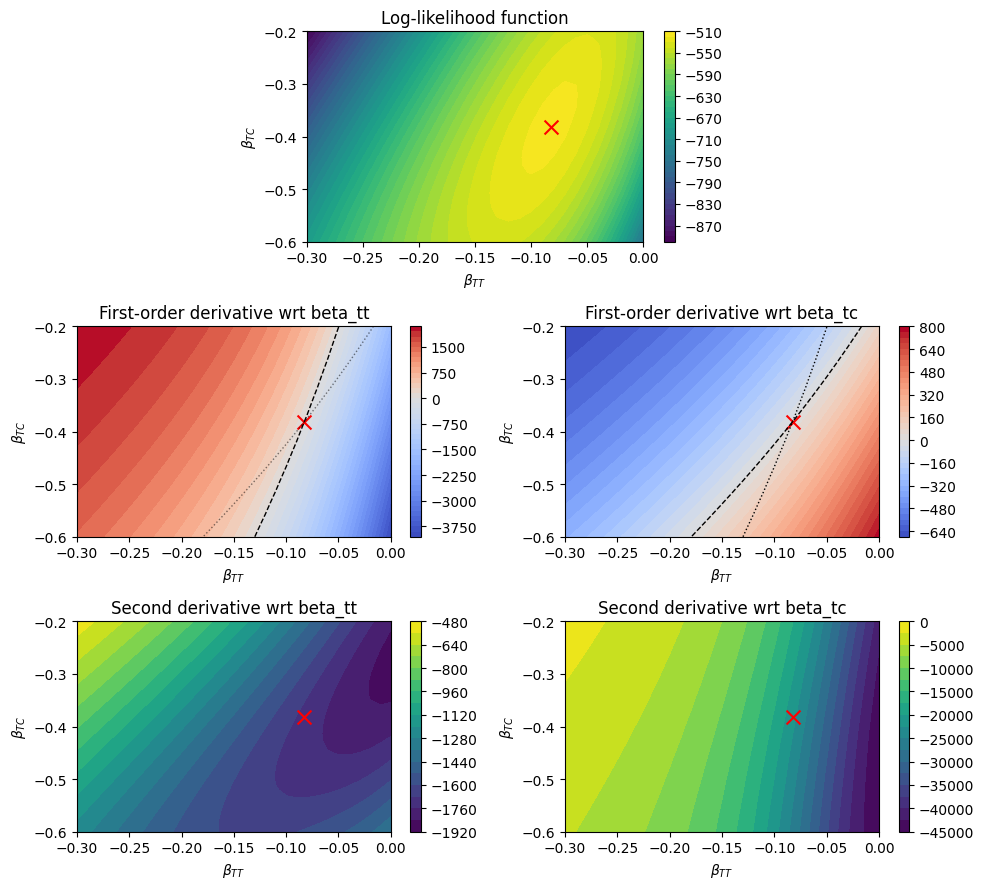

In [10]:
# Plot the second derivative of the log-likelihood function
fig = plt.figure(figsize=(10, 9))

# Create a GridSpec with 3 rows and 2 columns
gs = GridSpec(3, 2, figure=fig, width_ratios=[2, 2])

# For the top row, create a subgridspec with 3 columns to center the plot
top_gs = gs[0, :].subgridspec(1, 3, width_ratios=[1, 2.5, 1])

# The middle subplot in the top row will hold your plot
ax00 = fig.add_subplot(top_gs[0, 1])  # Centered in the middle column

# Create subplots for the rest of the grid
ax10 = fig.add_subplot(gs[1, 0], sharex=ax00, sharey=ax00)
ax11 = fig.add_subplot(gs[1, 1], sharex=ax00, sharey=ax00)
ax20 = fig.add_subplot(gs[2, 0], sharex=ax00, sharey=ax00)
ax21 = fig.add_subplot(gs[2, 1], sharex=ax00, sharey=ax00)

# Estimates of the beta parameters for tutorial 1, used to mark the estimates in the plots
est_beta_tt = -0.082513
est_beta_tc = -0.381360

# Plot the log-likelihood function in the centered top plot
c = ax00.contourf(BETA_TT, BETA_TC, LL, levels=40, cmap='viridis')
fig.colorbar(c, ax=ax00)
ax00.set_title('Log-likelihood function')
ax00.set_xlabel('$\\beta_{TT}$')
ax00.set_ylabel('$\\beta_{TC}$')
ax00.scatter(est_beta_tt, est_beta_tc, color='red', marker='x', s=100)

# Create a MidpointNorm to centre the colormap for the first-rder derivatives at 0
norm_tt = mcolors.TwoSlopeNorm(vmin=dLL_db1.min(), vmax=dLL_db1.max(), vcenter=0)
norm_tc = mcolors.TwoSlopeNorm(vmin=dLL_db2.min(), vmax=dLL_db2.max(), vcenter=0)

# Plot the first-order derivative with respect to beta_tt
c = ax10.contourf(BETA_TT, BETA_TC, dLL_db1, levels=40, cmap='coolwarm', norm=norm_tt)
ax10.contour(BETA_TT, BETA_TC, dLL_db1, levels=[0], colors='black', linewidths=1, linestyles='dashed')
ax10.contour(BETA_TT, BETA_TC, dLL_db2, levels=[0], colors='black', linewidths=1, linestyles=':', alpha=0.5)
fig.colorbar(c, ax=ax10)
ax10.set_title('First-order derivative wrt beta_tt')
ax10.set_xlabel('$\\beta_{TT}$')
ax10.set_ylabel('$\\beta_{TC}$')
ax10.scatter(est_beta_tt, est_beta_tc, color='red', marker='x', s=100)

# Plot the first-order derivative with respect to beta_tc
c = ax11.contourf(BETA_TT, BETA_TC, dLL_db2, levels=40, cmap='coolwarm', norm=norm_tc)   
ax11.contour(BETA_TT, BETA_TC, dLL_db2, levels=[0], colors='black', linewidths=1, linestyles='dashed')
ax11.contour(BETA_TT, BETA_TC, dLL_db1, levels=[0], colors='black', linewidths=1, linestyles=':')
fig.colorbar(c, ax=ax11)
ax11.set_title('First-order derivative wrt beta_tc')
ax11.set_xlabel('$\\beta_{TT}$')
ax11.set_ylabel('$\\beta_{TC}$')
ax11.scatter(est_beta_tt, est_beta_tc, color='red', marker='x', s=100)

# Plot the second derivative with respect to beta_tt
c = ax20.contourf(BETA_TT, BETA_TC, ddLL_db1db1, levels=20, cmap='viridis')
fig.colorbar(c, ax=ax20)
ax20.set_title('Second derivative wrt beta_tt')
ax20.set_xlabel('$\\beta_{TT}$')
ax20.set_ylabel('$\\beta_{TC}$')
ax20.scatter(est_beta_tt, est_beta_tc, color='red', marker='x', s=100)

# Plot the second derivative with respect to beta_tc
c = ax21.contourf(BETA_TT, BETA_TC, ddLL_db2db2, levels=20, cmap='viridis')
fig.colorbar(c, ax=ax21)
ax21.set_title('Second derivative wrt beta_tc')
ax21.set_xlabel('$\\beta_{TT}$')
ax21.set_ylabel('$\\beta_{TC}$')
ax21.scatter(est_beta_tt, est_beta_tc, color='red', marker='x', s=100)

plt.tight_layout()
plt.show()

`Based on the plot, we can make a couple of observations:`<br><br>
1. At the top plot ($LL$), the red X-marker indicates location of the estimated parameters from tutorial 1. It can be seen that these coincide neatly with the maximum of the log-likelihood function.<br><br>
2. In the middle, the left-hand side plot ($\frac{dLL}{d\beta_{TT}}$) shows that the first order derivative w.r.t. $\beta_{TT}$ is zero along the dashed line; Similarly, the right-hand side plot ($\frac{dLL}{d\beta_{TC}}$) shows the first order derivative w.r.t. $\beta_{TC}$ is zero along the dashed line. (the dotted line is a copy of the dashed line of the other plot)<br><br>
3. At the intersection of the two dashed lines, the first order derivatives w.r.t. $\beta_{TT}$ and $\beta_{TC}$ (i.e. all parameters) are zero, indicating a maximum.<br><br>
4. At the bottom, the twos plots ($\frac{d^2LL}{d\beta d\beta}$) show that the second order derivatives are negative in the entire domains, which confirms that the log-likelihood function of the linear-additive RUM-MNL model is globally concave.<br><br>
5. Of course, these results only proof that the log-likelihood function is concave for ranges used for $\beta_{TT}$ and $\beta_{TC}$. It does not proof that the log-likelihood function is concave for all possible betas. Hence, the mathematical proof is still needed.